In [6]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import skew
import statistics
from scipy import stats
from IPython.display import IFrame

In [7]:
import zipfile
with zipfile.ZipFile("/content/US_Accidents_Dec20.csv.zip","r") as zip_ref:
    zip_ref.extractall("US_Accidents_Dec21_updated.csv")

In [8]:
raw = pd.read_csv("/content/US_Accidents_Dec21_updated.csv/US_Accidents_Dec20.csv")

In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [10]:
col = []
for i in zip(raw.columns.values,raw.dtypes):
    if i[1] == 'O':
        col.append(i[0])

print(col)
raw[col]=raw[col].astype('category')

['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [11]:
def checkMissing(raw):
    missingValues = pd.DataFrame(raw.isnull().sum()).reset_index()
    missingValues.columns = ['Feature', 'Percent(%)']
    missingValues['Missing_Percent(%)'] = missingValues['Percent(%)'].apply(lambda x: x / raw.shape[0]*100)

    return missingValues
checkMissing(raw)

Feature  Percent(%)  Missing_Percent(%)
0                      ID           0            0.000000
1                  Source           0            0.000000
2                     TMC     1516064           35.819240
3                Severity           0            0.000000
4              Start_Time           0            0.000000
5                End_Time           0            0.000000
6               Start_Lat           0            0.000000
7               Start_Lng           0            0.000000
8                 End_Lat     2716477           64.180760
9                 End_Lng     2716477           64.180760
10           Distance(mi)           0            0.000000
11            Description           2            0.000047
12                 Number     2687949           63.506745
13                 Street           0            0.000000
14                   Side           0            0.000000
15                   City         137            0.003237
16                 County           0            0.000000
17                  State           0            0.000000
18                Zipcode        1292            0.030525
19                Country           0            0.000000
20               Timezone        4615            0.109036
21           Airport_Code        8973            0.212000
22      Weather_Timestamp       62644            1.480057
23         Temperature(F)       89900            2.124020
24          Wind_Chill(F)     1896001           44.795809
25            Humidity(%)       95467            2.255548
26           Pressure(in)       76384            1.804684
27         Visibility(mi)       98668            2.331176
28         Wind_Direction       83611            1.975433
29        Wind_Speed(mph)      479326           11.324781
30      Precipitation(in)     2065589           48.802575
31      Weather_Condition       98383            2.324443
32                Amenity           0            0.000000
33                   Bump           0            0.000000
34               Crossing           0            0.000000
35               Give_Way           0            0.000000
36               Junction           0            0.000000
37                No_Exit           0            0.000000
38                Railway           0            0.000000
39             Roundabout           0            0.000000
40                Station           0            0.000000
41                   Stop           0            0.000000
42        Traffic_Calming           0            0.000000
43         Traffic_Signal           0            0.000000
44           Turning_Loop           0            0.000000
45         Sunrise_Sunset         141            0.003331
46         Civil_Twilight         141            0.003331
47      Nautical_Twilight         141            0.003331
48  Astronomical_Twilight         141            0.003331

In [12]:
# dropping rows with null values
raw = raw.dropna(subset=['Street','Side','Zipcode','County','State','Timezone','Airport_Code','Weather_Timestamp','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Weather_Condition',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Turning_Loop'])

In [13]:
# checking if all missing values are replaced
checkMissing(raw)

Feature  Percent(%)  Missing_Percent(%)
0                      ID           0            0.000000
1                  Source           0            0.000000
2                     TMC     1370980           36.914963
3                Severity           0            0.000000
4              Start_Time           0            0.000000
5                End_Time           0            0.000000
6               Start_Lat           0            0.000000
7               Start_Lng           0            0.000000
8                 End_Lat     2342907           63.085037
9                 End_Lng     2342907           63.085037
10           Distance(mi)           0            0.000000
11            Description           2            0.000054
12                 Number     2352285           63.337549
13                 Street           0            0.000000
14                   Side           0            0.000000
15                   City           0            0.000000
16                 County           0            0.000000
17                  State           0            0.000000
18                Zipcode           0            0.000000
19                Country           0            0.000000
20               Timezone           0            0.000000
21           Airport_Code           0            0.000000
22      Weather_Timestamp           0            0.000000
23         Temperature(F)           0            0.000000
24          Wind_Chill(F)     1393697           37.526640
25            Humidity(%)           0            0.000000
26           Pressure(in)           0            0.000000
27         Visibility(mi)           0            0.000000
28         Wind_Direction           0            0.000000
29        Wind_Speed(mph)           0            0.000000
30      Precipitation(in)     1613879           43.455253
31      Weather_Condition           0            0.000000
32                Amenity           0            0.000000
33                   Bump           0            0.000000
34               Crossing           0            0.000000
35               Give_Way           0            0.000000
36               Junction           0            0.000000
37                No_Exit           0            0.000000
38                Railway           0            0.000000
39             Roundabout           0            0.000000
40                Station           0            0.000000
41                   Stop           0            0.000000
42        Traffic_Calming           0            0.000000
43         Traffic_Signal           0            0.000000
44           Turning_Loop           0            0.000000
45         Sunrise_Sunset           0            0.000000
46         Civil_Twilight           0            0.000000
47      Nautical_Twilight           0            0.000000
48  Astronomical_Twilight           0            0.000000

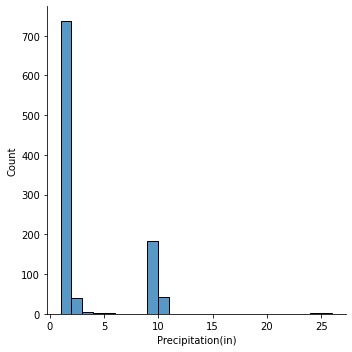

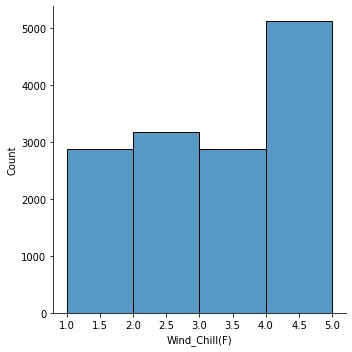

In [14]:
sns.displot(raw, x='Precipitation(in)', bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
sns.displot(raw, x='Wind_Chill(F)', bins=[1,2,3,4,5])

In [15]:
sns.boxplot(x=raw["Precipitation(in)"])

In [16]:
sns.boxplot(x=raw["Wind_Chill(F)"])

In [17]:
raw['Wind_Chill(F)'] = raw['Wind_Chill(F)'].fillna(raw['Wind_Chill(F)'].mode()[0])
raw['Precipitation(in)'] = raw['Precipitation(in)'].fillna(raw['Precipitation(in)'].mode()[0])

In [18]:
cm = raw.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(cm, vmin=-1, vmax=1, cmap="PuOr")
plt.show()

In [19]:
raw.drop(['ID','Number'], axis=1, inplace=True)
raw.drop(['Start_Lat','Start_Lng','End_Lat','End_Lng','Airport_Code', 'Country', 'Description','Turning_Loop', 'Weather_Timestamp'], axis=1, inplace=True)
raw.head(5)

Source    TMC  Severity           Start_Time             End_Time  \
2  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
5  MapQuest  201.0         3  2016-02-08 07:44:26  2016-02-08 08:14:26   
6  MapQuest  201.0         2  2016-02-08 07:59:35  2016-02-08 08:29:35   

   Distance(mi)                     Street Side          City      County  \
2          0.01             State Route 32    R  Williamsburg    Clermont   
3          0.01                     I-75 S    R        Dayton  Montgomery   
4          0.01  Miamisburg Centerville Rd    R        Dayton  Montgomery   
5          0.01             Westerville Rd    R   Westerville    Franklin   
6          0.00             N Woodward Ave    R        Dayton  Montgomery   

   ... Railway Roundabout Station   Stop  Traffic_Calming  Traffic_Signal  \
2  ...   False      False   False  False            False            True   
3  ...   False      False   False  False            False           False   
4  ...   False      False   False  False            False            True   
5  ...   False      False   False  False            False           False   
6  ...   False      False   False  False            False           False   

   Sunrise_Sunset  Civil_Twilight Nautical_Twilight  Astronomical_Twilight  
2           Night           Night               Day                    Day  
3           Night             Day               Day                    Day  
4             Day             Day               Day                    Day  
5             Day             Day               Day                    Day  
6             Day             Day               Day                    Day  

[5 rows x 38 columns]

In [20]:
checkMissing(raw)

Feature  Percent(%)  Missing_Percent(%)
0                  Source           0            0.000000
1                     TMC     1370980           36.914963
2                Severity           0            0.000000
3              Start_Time           0            0.000000
4                End_Time           0            0.000000
5            Distance(mi)           0            0.000000
6                  Street           0            0.000000
7                    Side           0            0.000000
8                    City           0            0.000000
9                  County           0            0.000000
10                  State           0            0.000000
11                Zipcode           0            0.000000
12               Timezone           0            0.000000
13         Temperature(F)           0            0.000000
14          Wind_Chill(F)           0            0.000000
15            Humidity(%)           0            0.000000
16           Pressure(in)           0            0.000000
17         Visibility(mi)           0            0.000000
18         Wind_Direction           0            0.000000
19        Wind_Speed(mph)           0            0.000000
20      Precipitation(in)           0            0.000000
21      Weather_Condition           0            0.000000
22                Amenity           0            0.000000
23                   Bump           0            0.000000
24               Crossing           0            0.000000
25               Give_Way           0            0.000000
26               Junction           0            0.000000
27                No_Exit           0            0.000000
28                Railway           0            0.000000
29             Roundabout           0            0.000000
30                Station           0            0.000000
31                   Stop           0            0.000000
32        Traffic_Calming           0            0.000000
33         Traffic_Signal           0            0.000000
34         Sunrise_Sunset           0            0.000000
35         Civil_Twilight           0            0.000000
36      Nautical_Twilight           0            0.000000
37  Astronomical_Twilight           0            0.000000

In [21]:
# checking how many categories are created for each feature
raw2 = raw.select_dtypes(include='category')
result = raw2.apply(pd.Series.unique)
result

Source                   ['MapQuest', 'MapQuest-Bing', 'Bing']
Categori...
Start_Time               ['2016-02-08 06:49:27', '2016-02-08 07:23:34',...
End_Time                 ['2016-02-08 07:19:27', '2016-02-08 07:53:34',...
Street                   ['State Route 32', 'I-75 S', 'Miamisburg Cente...
Side                     ['R', 'L', ' ']
Categories (3, object): [' ', ...
City                     ['Williamsburg', 'Dayton', 'Westerville', 'Col...
County                   ['Clermont', 'Montgomery', 'Franklin', 'Lickin...
State                    ['OH', 'WV', 'CA', 'FL', 'GA', ..., 'ID', 'WY'...
Zipcode                  ['45176', '45417', '45459', '43081', '45417-24...
Timezone                 ['US/Eastern', 'US/Pacific', 'US/Central', 'US...
Wind_Direction           ['SW', 'SSW', 'WSW', 'WNW', 'NW', ..., 'W', 'S...
Weather_Condition        ['Overcast', 'Mostly Cloudy', 'Light Rain', 'R...
Sunrise_Sunset           ['Night', 'Day']
Categories (2, object): ['Day...
Civil_Twilight           

In [22]:
for i in result:
    print(len(i))

3
3206519
3319643
197346
3
11824
1734
49
451125
4
23
127
2
2
2
2


In [23]:
raw['Start_Time'] = pd.to_datetime(raw['Start_Time'])
raw['End_Time'] = pd.to_datetime(raw['End_Time'])

In [24]:
raw['Duration'] = raw.End_Time - raw.Start_Time 
raw['Duration'] = raw['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
raw['Year'] = raw['Start_Time'].dt.year

raw['Month'] = raw['Start_Time'].dt.month
raw['Weekday']= raw['Start_Time'].dt.weekday



In [25]:
print(raw['Precipitation(in)'].max())
print(raw['Precipitation(in)'].min())

raw.loc[(raw["Precipitation(in)"] == 0), "Rainfall"] = 0

raw.loc[(raw["Precipitation(in)"] > 0) &(raw["Precipitation(in)"] < 5) , "Rainfall"] = 1

raw.loc[(raw["Precipitation(in)"] >= 5) &(raw["Precipitation(in)"] < 15) , "Rainfall"] = 2

raw.loc[(raw["Precipitation(in)"] >= 15), "Rainfall"] = 3
raw["Rainfall"].astype(int)

25.0
0.0


2          0
3          0
4          0
5          1
6          0
          ..
4232536    0
4232537    0
4232538    0
4232539    0
4232540    0
Name: Rainfall, Length: 3713887, dtype: int64

In [26]:
sev_count = raw["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Severity Count")
sns.barplot(sev_count.index, sev_count.values)
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [27]:
#undersampling
size = len(raw[raw["Severity"]==1].index)
df = pd.DataFrame()
for i in range(1,5):
    S = raw[raw["Severity"]==i]
    df = df.append(S.sample(size, random_state=42))
raw = df

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Duration','Year', 'Month','Weekday']
raw[features] = scaler.fit_transform(raw[features])

In [29]:
import plotly.express as px
fig = px.histogram(raw, x="State",
             color='Severity', barmode='group',
             histfunc='sum',
             height=1500)
fig.update_layout(
    title="Severity of Accidents in Different States",
    yaxis_title="Count"
)
fig.show()

In [30]:
fig = px.histogram(raw, x="State",
             color='Side', barmode='group',
             histfunc='sum',
             height=700)
fig.update_layout(
    title="Count of Accidents on Right and Left Side of the Road for Different States",
    yaxis_title="Count"
)
fig.show()

In [31]:
fig = px.histogram(raw, x="Side",
             color='Sunrise_Sunset', barmode='group',
             histfunc='sum',
             height=600)
fig.update_layout(
    title="Total occurrence of Right and Left Side of the Road Differentiated for Day and Night Time",
    yaxis_title="Total Occurence"
)
fig.show()

Linear Regression

In [32]:
raw.drop(['TMC'], axis=1, inplace=True)

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

colist = raw.columns.values.tolist()
X_train, X_test, y_train, y_test = train_test_split(raw[colist[1:]],raw['Severity'], test_size=0.20, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(91324, 41) (22832, 41) (91324,) (22832,)


In [34]:
labelencoder = LabelEncoder()
for j,i in X_train.iteritems():
  if i.dtype == 'category' or i.dtype == 'bool':
    X_train[j] = labelencoder.fit_transform(X_train[j])

In [35]:
for j,i in X_test.iteritems():
  if i.dtype == 'category' or i.dtype == 'bool':
    X_test[j] = labelencoder.fit_transform(X_test[j])

In [36]:
X_train.drop(['Start_Time','End_Time'], axis=1, inplace=True)
X_test.drop(['Start_Time','End_Time'], axis=1, inplace=True)

In [ ]:
model_lr = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2, 3),
        'penalty': ['l2','l1'],
        'solver':['newton-cg', 'lbfgs', 'liblinear'],
        'class_weight': ['balanced']}
grid_lr = GridSearchCV(model_lr, grid, cv=5, n_jobs=8, scoring='f1_macro', verbose = 10)
print(model_lr.get_params().keys())
grid_lr.fit(X_train, y_train.values.ravel())
print("best score: ", grid_lr.best_score_,"best param: ",grid_lr.best_params_ )

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [ ]:
y_pred = grid_lr.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc)

accuracy:  0.9974597056762439


In [ ]:
con = confusion_matrix(y_true=y_test, y_pred=y_pred2)

i = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
c = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=con, columns=c, index=i)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve  

In [52]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [ ]:
Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = model_lr_2.predict_proba(X_test)

precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where='post')
plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

SVM

In [37]:
from sklearn import svm

In [38]:
svm_model = svm.SVC(C=1, gamma='auto', random_state=42, verbose=5)
svm_model.fit(X_train,y_train)

print("Train score:", svm_model.score(X_train, y_train))
print("Test score:", svm_model.score(X_test, y_test))

[LibSVM]Train score: 0.9862905698392537
Test score: 0.254073230553609


In [44]:
preds = svm_model.predict(X_test)

In [45]:
acc_s=accuracy_score(y_test, preds)
print("accuracy: ",acc_s)

accuracy:  0.254073230553609


In [46]:
con = confusion_matrix(y_true=y_test, y_pred=preds)

i = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
c = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=con, columns=c, index=i)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve

In [ ]:
from sklearn.preprocessing import label_binarize

Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = svm_model.decision_function(X_test)


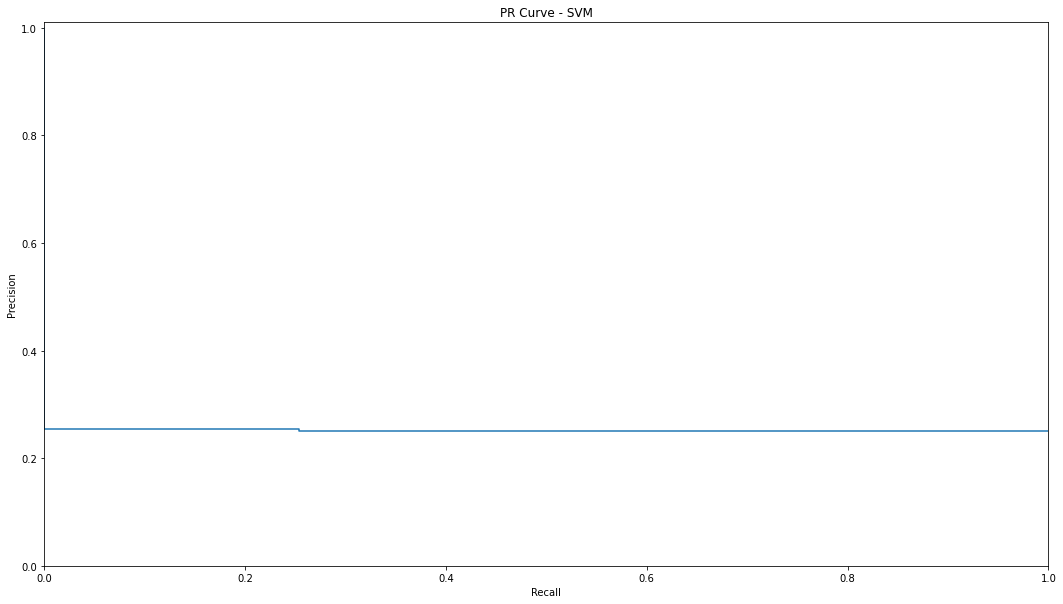

In [55]:
precision["SVM"], recall["SVM"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["SVM"], tpr["SVM"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["SVM"], precision["SVM"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - SVM")
plt.show()

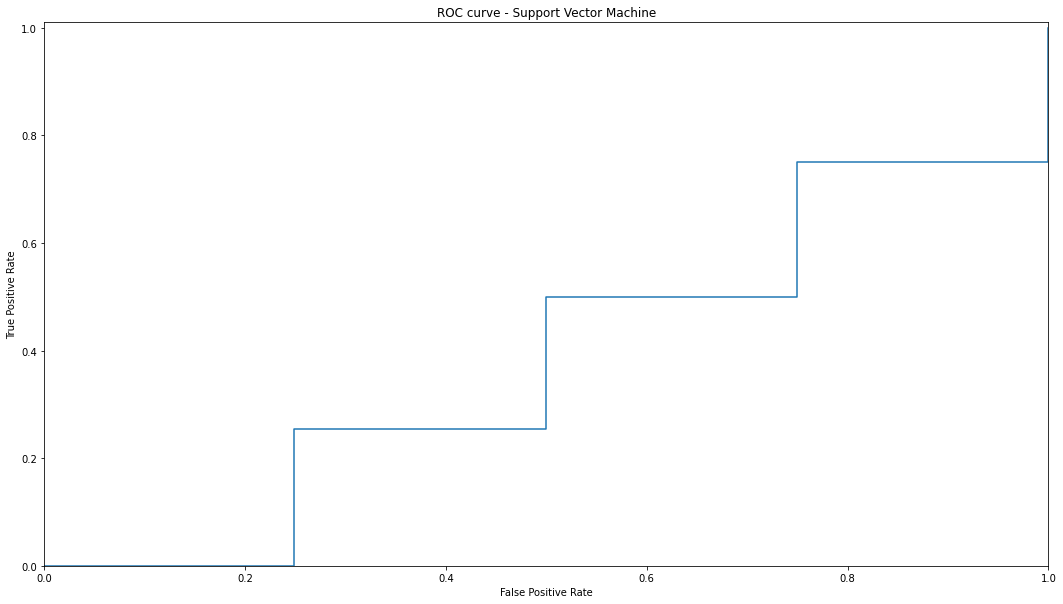

In [56]:
plt.figure(figsize=(18, 10))
plt.step(fpr["SVM"], tpr["SVM"], where="post")

plt.title("ROC curve - Support Vector Machine")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()